<hr>
<h1 style="text-align: center;">Vortex Panel Method</h1>
<hr>

<h3 style="text-align: center;">Nicholas Richmond</h3>
<h3 style="text-align: center;">Student ID: 919578115</h3>
<h3 style="text-align: center;">Project #: 4</h3>
<h3 style="text-align: center;">Date: 11/22/24</h3>

<h3 style="text-align: center;">EAE 127: Applied Aerodynamics</h3>
<h3 style="text-align: center;">University of California, Davis</h3>

<hr>

In [12]:
#standard imports and setups
import math
import pandas as pd #type: ignore
import numpy as np #type: ignore
import os
import matplotlib.pyplot as plt #type: ignore
import matplotlib.lines as mlines
from scipy import integrate
### JUPYTER NOTEBOOK SETTINGS ########################################
#Plot all figures in full-size cells, no scroll bars
%matplotlib inline
#Disable Python Warning Output
#(NOTE: Only for production, comment out for debugging)
import warnings
warnings.filterwarnings('ignore')
### PLOTTING DEFAULTS BOILERPLATE (OPTIONAL) #########################
#SET DEFAULT FIGURE APPERANCE
import seaborn as sns #Fancy plotting package #type: ignore
#No Background fill, legend font scale, frame on legend
sns.set_theme(style='whitegrid', font_scale=1.5, rc={'legend.frameon': True})
#Mark ticks with border on all four sides (overrides 'whitegrid')
sns.set_style('ticks')
#ticks point in
sns.set_style({"xtick.direction": "in","ytick.direction": "in"})
#fix invisible marker bug
sns.set_context(rc={'lines.markeredgewidth': 0.1})
#restore default matplotlib colormap
mplcolors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
'#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
sns.set_palette(mplcolors)

#Get color cycle for manual colors
colors = sns.color_palette()
#SET MATPLOTLIB DEFAULTS
#(call after seaborn, which changes some defaults)
params = {
#FONT SIZES
'axes.labelsize' : 30, #Axis Labels
'axes.titlesize' : 30, #Title
'font.size' : 28, #Textbox
'xtick.labelsize': 22, #Axis tick labels
'ytick.labelsize': 22, #Axis tick labels
'legend.fontsize': 24, #Legend font size
'font.family' : 'serif',
'font.fantasy' : 'xkcd',
'font.sans-serif': 'Helvetica',
'font.monospace' : 'Courier',
#AXIS PROPERTIES
'axes.titlepad' : 2*6.0, #title spacing from axis
'axes.grid' : True, #grid on plot
'figure.figsize' : (8,8), #square plots
'savefig.bbox' : 'tight', #reduce whitespace in saved figures
#LEGEND PROPERTIES
'legend.framealpha' : 0.5,
'legend.fancybox' : True,
'legend.frameon' : True,
'legend.numpoints' : 1,
'legend.scatterpoints' : 1,
'legend.borderpad' : 0.1,
'legend.borderaxespad' : 0.1,
'legend.handletextpad' : 0.2,
'legend.handlelength' : 1.0,
'legend.labelspacing' : 0,
}
import matplotlib #type:ignore
matplotlib.rcParams.update(params) #update matplotlib defaults, call after￿
### END OF BOILERPLATE ##################################################
colors = sns.color_palette() #color cycle

## Problem 1: Vortex Potential Flow

This problem asks us to plot a single vortex, 12 vorticies (finite vortex sheet), and an infinite vortex sheet (or, rather, an approximation of one). 

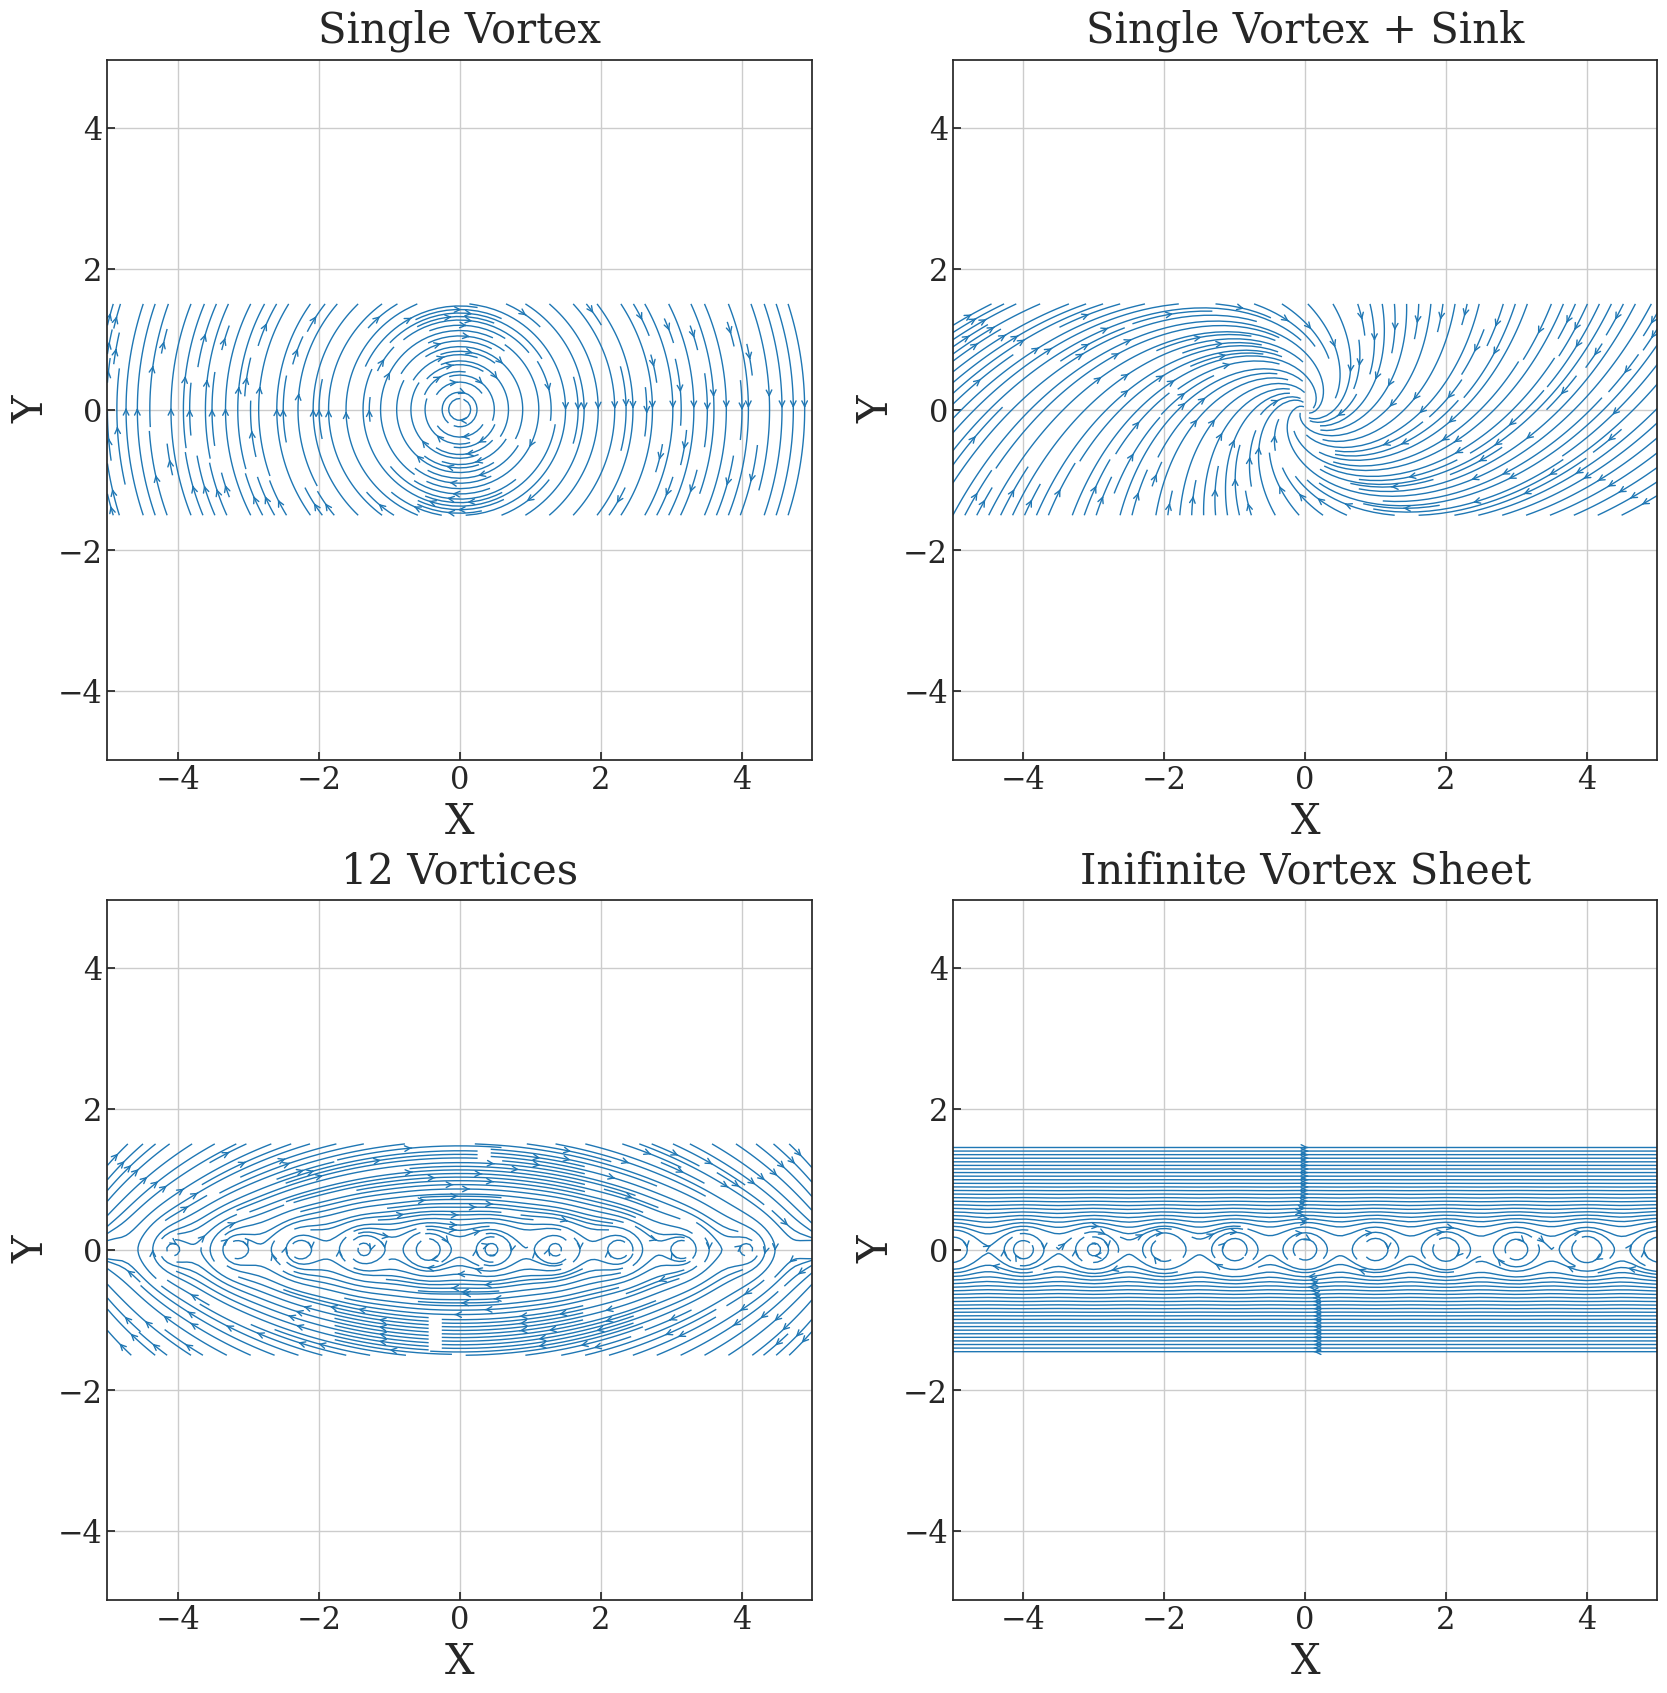

In [46]:
#set up functions and meshgrid

N = 250                                         # Number of points/sections to use in each direction for our flow
x_start, x_end = -5.0, 5.0                      # Boundaries of our flow in the x direction 
y_start, y_end = -1.5, 1.5                      # Boundaries of our flow in the y direction 

# Note, you can adjust the start and end points later to get the best image of your plot / flow

x = np.linspace(x_start, x_end, N)              # 1D array of x points
y = np.linspace(y_start, y_end, N)              # 1D array of y points
X, Y = np.meshgrid(x, y) 

def get_vortex_velocity(Gamma, xv, yv, X, Y):
    """
    Returns the velocity field generated by a vortex
    
    Parameters
    ----------
    Gamma: float
        Strength of the vortex.
    xv: float
        x-coordinate of the vortex.
    yv: float
        y-coordinate of the vortex.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    u: 2D Numpy array of floats
        x-component of the velocity vector field.
    v: 2D Numpy array of floats
        y-component of the velocity vector field.
    """
    # Here, input the equation for u_vortex from the equations above
    u = (Gamma/(2*np.pi))*((Y-yv)/((X-xv)**2 + (Y-yv)**2))

    # Here, input the equation for v_vortex from the equations above
    v = -1 * (Gamma/(2*np.pi)) * ((X-xv)/((X-xv)**2 + (Y-yv)**2))
    
    return u, v
def get_velocity(strength, xs, ys, X, Y):
    """
    Returns the velocity field generated by a source/sink.
    
    Parameters
    ----------
    strength: float
        Strength of the source/sink.
    xs: float
        x-coordinate of the source (or sink).
    ys: float
        y-coordinate of the source (or sink).
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    u: 2D Numpy array of floats
        x-component of the velocity vector field.
    v: 2D Numpy array of floats
        y-component of the velocity vector field.
    """
    # Here, input the equation for u_source from the equations above
    u = strength / (2 * np.pi) * (X - xs) / ((X - xs)**2 + (Y - ys)**2)

    # Here, input the equation for v_source from the equations above
    v = strength / (2 * np.pi) * (Y - ys) / ((X - xs)**2 + (Y - ys)**2)
    
    return u, v
def infinite_vortex_vel(Gamma, a, X, Y):
    """
    Parameters
    ----------
    a: float
        Spacing between the vortices
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    u: 2D Numpy array of floats
        x-component of the velocity vector field.
    v: 2D Numpy array of floats
        y-component of the velocity vector field.
    """
    # Here, input the equation for u_vortex from the equations above
    u = (Gamma/(2*a)) * (np.sinh(2*np.pi*Y/a)) / (np.cosh(2*np.pi*Y/a) - np.cos(2*np.pi*X/a))

    # Here, input the equation for v_vortex from the equations above
    v = -1* (Gamma/(2*a)) * (np.sin(2*np.pi*X/a)) / (np.cosh(2*np.pi*Y/a) - np.cos(2*np.pi*X/a))
    
    return u, v

vortStrength = 5
sstrength = -5

uVort, vVort = get_vortex_velocity(vortStrength,0,0,X,Y)
uSink, vSink = get_velocity(sstrength,0,0,X,Y)
uInfVort, vInfVort = infinite_vortex_vel(vortStrength,1,X,Y)


plt.figure(figsize=(20,20))

plt.subplot(2,2,1)
plt.title("Single Vortex")
plt.xlabel("X")
plt.ylabel("Y")
plt.streamplot(X, Y, uVort, vVort, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
plt.axis("equal")

plt.subplot(2,2,2)
plt.title("Single Vortex + Sink")
plt.xlabel("X")
plt.ylabel("Y")
plt.streamplot(X, Y, uVort + uSink, vVort + vSink, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
plt.axis("equal")

sum_uVort = 0
sum_vVort = 0

nVortices = 12 #Number of vortices we want to plot
for xLoc in np.linspace(-5,5,nVortices):
    u, v = get_vortex_velocity(vortStrength,xLoc,0,X,Y)
    sum_uVort += u
    sum_vVort += v

plt.subplot(2,2,3)
plt.title("12 Vortices")
plt.xlabel("X")
plt.ylabel("Y")
plt.streamplot(X, Y, sum_uVort, sum_vVort, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
plt.axis("equal");

plt.subplot(2,2,4)
plt.title("Inifinite Vortex Sheet")
plt.xlabel("X")
plt.ylabel("Y")
plt.streamplot(X, Y, uInfVort, vInfVort, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
plt.axis("equal");

[COMPARISON]
<hr>


In [67]:
#define each of the functions
class Panel:
    """
    Here, we are creating a panel object and all its necessary information. 
    """

    def __init__(self, xa, ya, xb, yb):
        """
        Initialization of the panel.

        Here, we write a specific piece of code to be run everytime we create a panel object. In a general sense, the "init" command/function
        will be run every time that we create a new panel.

        Our code needs to calculate the center point of the panel, the length, and its angle.

        Our code also needs to make space for the source strength, tangential velocity, and pressure coefficient
        (which we will define for a specific panel later)
        
        Parameters:
        -----------
        xa: float
            x - coordinate of the first end point
        ya: float
            y - coordinate of the first end point
        xb: float
            x - coordinate of the second end point
        yb: float
            y - coordinate of the second end point
        xc: float
            x - coordinate of the center point of the panel
        yc: float
            y - coordinate of the center point of the panel 
        length: float
            length of the panel
        beta: float
            orientation/angle of the panel

        These parameters are not defined until later. We set them equal to zero below. 
        sigma: float
            source sheet strength
        vt: float
            velocity tangential to the panel
        cp: float
            pressure coefficient


        """

        self.xa, self.ya = xa, ya           # Defines the first end point
        self.xb, self.yb = xb, yb           # Defines the second end point

        # Defining center point and panel parameters
        # You will need to define these yourself:
        self.xc, self.yc = (xa + xb) / 2, (ya + yb) / 2         # Control point or center point (How do you find the center of two points?)
        self.length = math.sqrt((xb - xa)**2 + (yb - ya)**2)    # Length of the panel (How do you find the distance between two points)

        # For the orientation of the panel (angle between x axis and the unit vector normal to the panel)
        if xb - xa <= 0:
            self.beta = math.acos((yb - ya) / self.length)
        elif xb - xa > 0:
            self.beta = math.pi + math.acos(-(yb - ya) / self.length)

        # Location of the panel (we will use this later when we expand our analys to airfoils)
        if self.beta <= math.pi:
            self.loc = 'upper'
        else:
            self.loc = 'lower'

        # Will need a value for theta
        self.theta = math.atan2(self.yc, self.xc)
        # We also need 3 more parameters, sigma, vt for tangential velocity, and cp for pressure distribution. 
        # Create these and set the equal to zero for now
        

        self.sigma = 0.0 
        self.vt = 0.0
        self.cp = 0.0       
def define_panels(x, y, N=40):
    """
    Discretizes the geometry into panels using the 'circle mapping' method.
    
    Parameters
    ----------
    x: 1D array of floats
        x-coordinate of the points defining the geometry.
    y: 1D array of floats
        y-coordinate of the points defining the geometry.
    N: integer, optional
        Number of panels;
        default: 40.
    
    Returns
    -------
    panels: 1D Numpy array of Panel objects
        The discretization of the geometry into panels.
    """
    R = (x.max() - x.min()) / 2                 # Radius of the circle, based on airfoil geometry
    x_center = (x.max() + x.min()) / 2          # X coordinate of center of circle

    x_circle = x_center + R * np.cos(np.linspace(0.0, 2 * math.pi, N + 1))
    # Here we define the x coordinates of the circle
    
    x_ends = np.copy(x_circle)                  # projection of the x-coord on the surface
    y_ends = np.empty_like(x_ends)              # initialization of the y-coord Numpy array

    x, y = np.append(x, x[0]), np.append(y, y[0])  # extend arrays using numpy.append

    # computes the y-coordinate of end-points
    I = 0   
    for i in range(N):
        while I < len(x) - 1:
            if (x[I] <= x_ends[i] <= x[I + 1]) or (x[I + 1] <= x_ends[i] <= x[I]):
                break
            else:
                I += 1
        a = (y[I + 1] - y[I]) / (x[I + 1] - x[I])
        b = y[I + 1] - a * x[I + 1]
        y_ends[i] = a * x_ends[i] + b
        #print(i)
        #print(I)
    x_ends[N] = x_ends[0]
    y_ends[N] = y_ends[0]
    
    panels = np.empty(N, dtype=object)
    for i in range(N):
        panels[i] = Panel(x_ends[i], y_ends[i], x_ends[i + 1], y_ends[i + 1])
    
    return panels
def vortex_integral_normal(p_i, p_j):
    """
    Evaluates the contribution of a source-panel at the center-point of another,
    in the normal direction.

    Parameters:
    -----------
    p_i: Panel object
        Panel on which the contribution is calculated.
    p_j: Panel object
        Panel from which the contribution is calculated. 
    """

    def integrand(s):
        return (((p_i.xc - (p_j.xa - np.sin(p_j.beta)*s)) * (np.sin(p_i.beta))  - 
                 (p_i.yc - (p_j.ya + np.cos(p_j.beta)*s)) * (np.cos(p_i.beta))) /
                ((p_i.xc - (p_j.xa - np.sin(p_j.beta)*s))**2 + 
                 (p_i.yc - (p_j.ya + np.cos(p_j.beta)*s))**2)) 
    return integrate.quad(integrand, 0.0, p_j.length)[0]
def source_integral_normal(p_i, p_j):
    """
    Evaluates the contribution of a source-panel at the center-point of another,
    in the normal direction.

    Parameters:
    -----------
    p_i: Panel object
        Panel on which the contribution is calculated.
    p_j: Panel object
        Panel from which the contribution is calculated. 
    """

    ## Fill in the equation below for the function integrand
    def integrand(s):
        return (((p_i.xc - (p_j.xa - math.sin(p_j.beta) * s)) * math.cos(p_i.beta) +
                 (p_i.yc - (p_j.ya + math.cos(p_j.beta) * s)) * math.sin(p_i.beta)) /
                ((p_i.xc - (p_j.xa - math.sin(p_j.beta) * s))**2 +
                 (p_i.yc - (p_j.ya + math.cos(p_j.beta) * s))**2))
    return integrate.quad(integrand, 0.0, p_j.length)[0]
def analyze_panels(panels,uinf,alpha):
    """"
    Here, we write some code to analyze our panels after they have been created. 

    Creates a source influence matrix [A]


    Input: an array of panels created using the Panel function (panels) and a freestream velocity (u_inf). 

    """

    Num = len(panels)

    A_s = np.empty((Num, Num), dtype = float)
    A_v = np.empty((Num, Num), dtype = float)

    np.fill_diagonal(A_s, 0.5)
        # Whenever we have i = j, we have sigma(i)/2 or sigma(i)*0.5. Thus, on our diagonal for matrix A we should have 0.5 
        # The diagonal of a matrix means i = j i.e (1,1), (2,2), etc etc.
        # Remember that this represents how much a source panel conributes to its OWN normal velocity

    np.fill_diagonal(A_v, 0.0)
        # Here, we have the same thing, but for vortex contributions on normal velocity.

    # Create the source influence matrix [A_s] of the linear system
    # This represents how much a source panel contributes to OTHER panels normal velocity.
    for i, p_i in enumerate(panels):
        for j, p_j in enumerate(panels):
            if i != j:
                A_s[i,j] = (0.5/np.pi) * source_integral_normal(p_i, p_j)
                # Here, we create a matrix called A_s to hold the source contributions
                # Make sure that you change this to use our new functions rather than our old ones. 

    # Create the vortex influence matrix [A_v]
    for i, p_i in enumerate(panels):
        for j, p_j in enumerate(panels):
            if i != j:
                A_v[i,j] = (-1 * 0.5/np.pi) * vortex_integral_normal(p_i,p_j)
                # Here, we create a matrix called A_s to hold the source contributions
                # Make sure that you change this to use our new functions rather than our old ones. 

    A_s_norm = A_s
    A_v_norm = A_v

    # Kutta Condition:
    # First, lets create an array to hold all of our values.
    # This array should be of length N + 1 (the number of panels + 1)
    Kutta = np.empty(A_s.shape[0] + 1, dtype=float)
    
    # Next, we would like all the elements of our Kutta array (except the last)
    # to be equal to the first and last values of our vortex contribution matrix.
    Kutta[:-1] = A_v[0, :] + A_v[-1, :]

    # Finally, we make the last element of our Kutta array equal to the sum of 
    # all the last elements of our source contribution matrix. 
    Kutta[-1] = - np.sum(A_s[0, :] + A_s[-1, :])

    A = np.empty((Num+1, Num+1), dtype = float)

    # Enter the source contribution matrix
    # This takes up all but the last column and all but the last row
    # The vortex strength (gamma) and the kutta condition will take this place 
    A[:-1, :-1] = A_s_norm

    # Enter the vortex contribution array
    # Fills in the last column
    A[:-1, -1] = np.sum(A_v_norm, axis = 1)

    # Enter the Kutta array
    # Fills in the last row
    A[-1, :] = Kutta

    # Freestream Velocity and Matrix b
    # Lets start by creating an empty array b
    alpha = np.radians(alpha)
    b = np.empty(Num + 1, dtype = float)

    for i, panel in enumerate(panels):
        b[i] = - uinf * np.cos(alpha - panel.beta)

    # Freestream contribution on the Kutta condition
    b[-1] = - uinf * (math.sin(alpha - panels[0].beta) + math.sin(alpha - panels[-1].beta))
    

    # Here we solve for the Strength sigma
    Strengths = np.linalg.solve(A,b)

    for i, panel in enumerate(panels):
        panel.sigma = Strengths[i]

    # The very last value in our strength array is the value gamma, or the constant vortex strength across each panel

    gamma = Strengths[-1]
    
    # Now tht we know what our source panel strengths are, as well as our vortex strength, we can use these values
    # In order to computer the tangential velocity at each panel. We use a new array in order to do this
    
    # Computing Tangential Velocity
    A_t = np.empty((panels.size, panels.size+1), dtype = float)

    A_t[:, :-1] = A_v
    A_t[:, -1] = -np.sum(A_s, axis = 1)
    
    b_t = uinf * np.sin([alpha - panel.beta for panel in panels])

    vortex_strengths = np.append([panel.sigma for panel in panels], gamma)

    tan_vel = np.dot(A_t, vortex_strengths) + b_t

    for i, panel in enumerate(panels):
        panel.vt = tan_vel[i]


    # Finally, we need to compute the pressure coefficient. 
    for panel in panels:
        panel.cp = 1 - (panel.vt/uinf)**2

    accuracy = sum([panel.sigma * panel.length for panel in panels])
    print('sum of singularity strengths: {:0.6f}'.format(accuracy))

uinf = 2.2 #m/s
rho = 1.2 #kg/m^3
chord = 1.2 #m
mu = 1.591736e-5 #N*s/m^2 --> This part was interpolated to metric since we are given imperial altitude

alpha = 4
alpha = alpha*np.pi/180

Re = uinf * chord * rho/ mu
print("Reynolds number to be used in analysis: {:.3g}".format(Re))


Reynolds number to be used in analysis: 1.99e+05


Explanation n whatnot

sum of singularity strengths: 0.017653
sum of singularity strengths: 0.012942


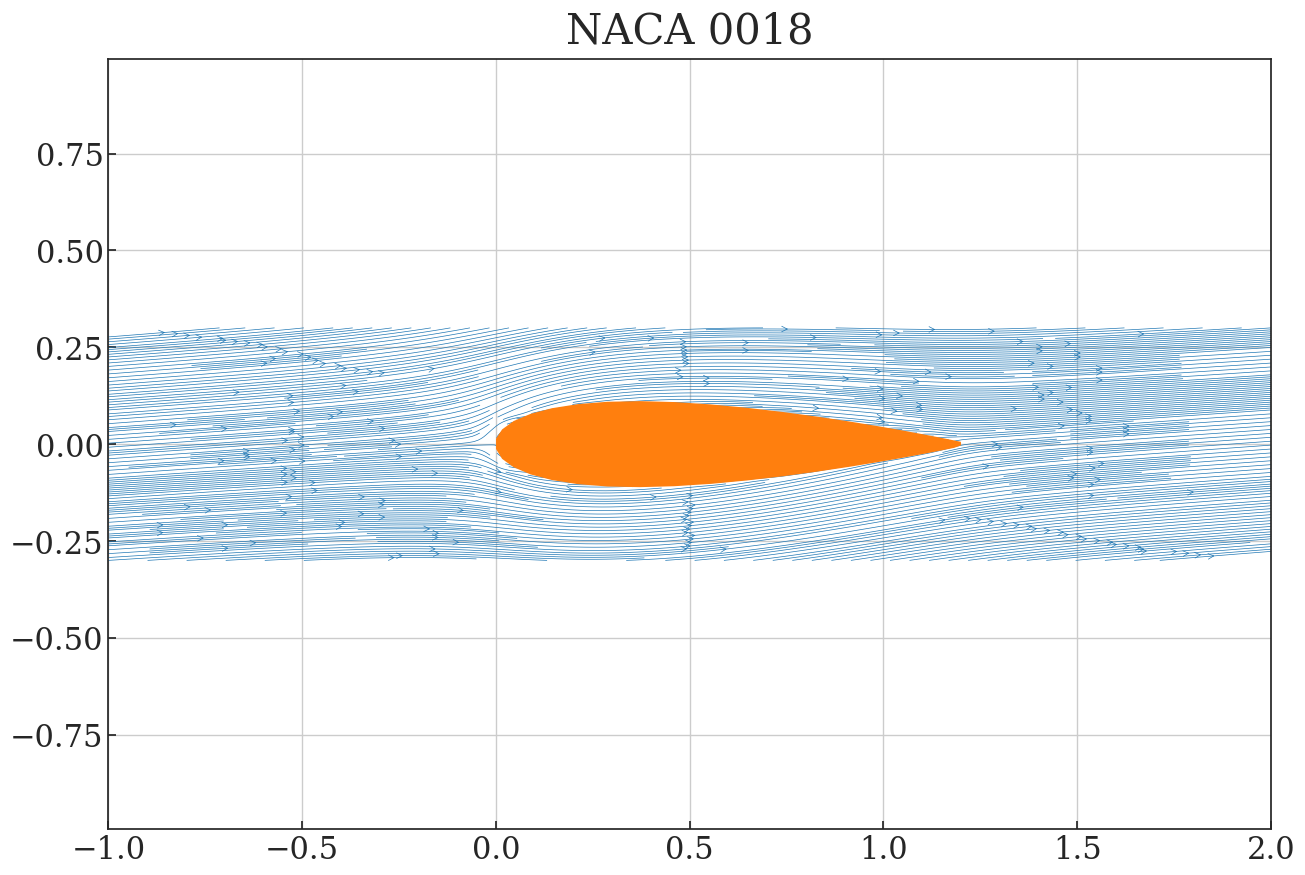

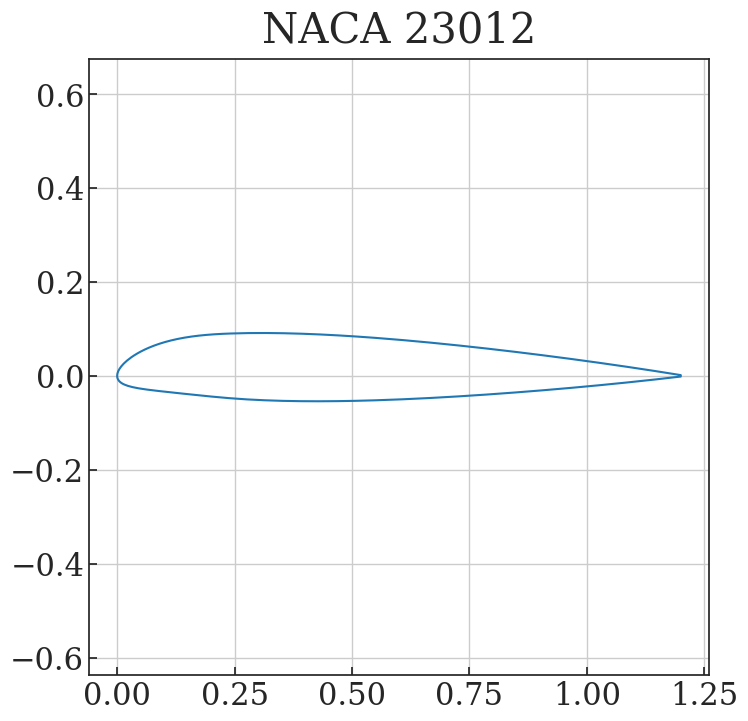

In [70]:
#plot everything

#define a new, smaller meshgrid
nx, ny = 40, 40  # number of points in the x and y directions
x_start, x_end = -1.0, 2.0
y_start, y_end = -0.3, 0.3
X, Y = np.meshgrid(np.linspace(x_start, x_end, nx),
                      np.linspace(y_start, y_end, ny))

folder = "airfoil-data"

filename = os.path.join(folder,"naca0018.txt")
x0018, z0018 = np.loadtxt(filename,dtype=float,skiprows=1,unpack=True)

filename = os.path.join(folder,"naca23012.txt")
x23012, z23012 = np.loadtxt(filename,dtype=float,skiprows=1,unpack=True)

#chord length isn't one, so mulitply everything by the chord lengthx
x0018 *= chord
z0018 *= chord
x23012 *= chord
z23012 *= chord

nPanels = 40
naca0018panels = define_panels(x0018,z0018,nPanels)
naca23012panels = define_panels(x23012,z23012,nPanels)

analyze_panels(naca0018panels,uinf,alpha)
analyze_panels(naca23012panels,uinf,alpha)

#function from aeropython to get the u and v velocity components in the meshgrid for any group of panels
def integral(x, y, panel, dxdz, dydz):
    """
    Evaluates the contribution of a panel at one point.
    
    Parameters
    ----------
    x: float
        x-coordinate of the target point.
    y: float
        y-coordinate of the target point.
    panel: Panel object
        Source panel which contribution is evaluated.
    dxdz: float
        Derivative of x in the z-direction.
    dydz: float
        Derivative of y in the z-direction.
    
    Returns
    -------
    Integral over the panel of the influence at the given target point.
    """
    def integrand(s):
        return (((x - (panel.xa - math.sin(panel.beta) * s)) * dxdz +
                 (y - (panel.ya + math.cos(panel.beta) * s)) * dydz) /
                ((x - (panel.xa - math.sin(panel.beta) * s))**2 +
                 (y - (panel.ya + math.cos(panel.beta) * s))**2) )
    return integrate.quad(integrand, 0.0, panel.length)[0]
def get_velocity_field(panels, uinf, alpha, X, Y):
    """
    Computes the velocity field on a given 2D mesh.
    
    Parameters
    ---------
    panels: 1D array of Panel objects
        The source panels.
    freestream: Freestream object
        The freestream conditions.
    X: 2D Numpy array of floats
        x-coordinates of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    u: 2D Numpy array of floats
        x-component of the velocity vector field.
    v: 2D Numpy array of floats
        y-component of the velocity vector field.
    """
    # freestream contribution
    u = uinf * math.cos(alpha) * np.ones_like(X, dtype=float)
    v = uinf * math.sin(alpha) * np.ones_like(X, dtype=float)
    # add the contribution from each source (superposition powers!!!)
    vec_intregral = np.vectorize(integral)
    for panel in panels:
        u += panel.sigma / (2.0 * math.pi) * vec_intregral(X, Y, panel, 1.0, 0.0)
        v += panel.sigma / (2.0 * math.pi) * vec_intregral(X, Y, panel, 0.0, 1.0)
    
    return u, v


u0018, v0018 = get_velocity_field(naca0018panels,uinf,alpha,X,Y)

plt.figure(figsize=(15,10))
plt.title("NACA 0018")
#plt.plot(x0018,z0018,color = colors[1])
plt.streamplot(X,Y,u0018,v0018,density=4,linewidth=0.5,arrowsize=1,arrowstyle='->',color = colors[0])
plt.fill([panel.xc for panel in naca0018panels],
            [panel.yc for panel in naca0018panels],
            color=colors[1], linestyle='solid', linewidth=2, zorder=2)
plt.axis("equal")

plt.figure()
plt.title("NACA 23012")
plt.plot(x23012,z23012)
plt.axis("equal");


